In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScale

In [2]:
df=pd.read_csv("mental_health_workplace_survey.csv")

In [3]:
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [13]:
df['Gender'].unique()

array(['Male', 'Non-binary', 'Prefer not to say', 'Female'], dtype=object)

In [14]:
df['Gender'].value_counts()

Gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64

In [15]:
df['Country'].unique()

array(['UK', 'Germany', 'India', 'Australia', 'Brazil', 'USA', 'Canada'],
      dtype=object)

In [16]:
df['Country'].value_counts()

Country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64

In [19]:
df['JobRole'].value_counts()

JobRole
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64

In [20]:
df['Department'].value_counts()

Department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64

In [21]:
df['HasTherapyAccess'].value_counts()

HasTherapyAccess
No     1511
Yes    1489
Name: count, dtype: int64

In [22]:
categorical_columns = ['Department', 'Country', 'Gender', 'JobRole', 'RemoteWork', 'HasTherapyAccess', 'HasMentalHealthSupport']
df_encoded= pd.get_dummies(df, columns=categorical_columns) #encoded
df_encoded.head()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,JobRole_Project Manager,JobRole_Sales Associate,JobRole_Software Engineer,RemoteWork_Hybrid,RemoteWork_No,RemoteWork_Yes,HasTherapyAccess_No,HasTherapyAccess_Yes,HasMentalHealthSupport_No,HasMentalHealthSupport_Yes
0,1001,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,...,False,True,False,False,True,False,False,True,True,False
1,1002,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,...,False,False,True,True,False,False,False,True,False,True
2,1003,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,...,False,False,False,True,False,False,True,False,True,False
3,1004,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,...,False,False,False,False,False,True,False,True,False,True
4,1005,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,...,False,False,False,False,False,True,False,True,False,True


In [23]:
df['Work stress']=df['WorkHoursPerWeek']*df['StressLevel']#Interaction Features

In [26]:
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk,Work stress
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0,445.09
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1,333.35
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,No,3.63,No,6,80K-100K,7.28,7,7.96,1,336.30
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0,198.40
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1,115.94


In [27]:
df['Workload'] = df['Work stress'] > 335

In [28]:
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk,Work stress,Workload
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,3.15,Yes,8,40K-60K,8.82,6,9.20,0,445.09,True
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,4.40,Yes,4,80K-100K,2.80,45,8.46,1,333.35,False
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,3.63,No,6,80K-100K,7.28,7,7.96,1,336.30,True
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,4.50,Yes,9,60K-80K,1.31,11,8.90,0,198.40,False
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,5.51,Yes,6,<40K,1.17,18,8.88,1,115.94,False


In [34]:

df = pd.read_csv('mental_health_workplace_survey.csv')
target = 'BurnoutLevel'
numerical_cols =['BurnoutRisk','BurnoutLevel','CommuteTime','ManagerSupportScore','MentalHealthDaysOff','WorkLifeBalanceScore','CareerGrowthScore']
numerical_cols.remove(target)  
scaler = StandardScaler() #scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,1.659954,No,-0.882776,Yes,1.210845,40K-60K,1.294820,6,1.433632,-0.696526
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,-1.471872,Yes,-0.401445,Yes,-0.190866,80K-100K,-1.018834,45,1.145294,1.435697
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,0.453195,No,-0.697945,No,0.509990,80K-100K,0.702955,7,0.950471,1.435697
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,-0.466240,Yes,-0.362939,Yes,1.561273,60K-80K,-1.591483,11,1.316738,-0.696526
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,-0.035255,Yes,0.025976,Yes,0.509990,<40K,-1.645288,18,1.308945,1.435697


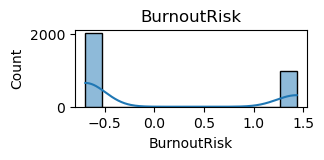

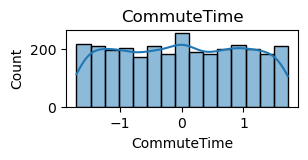

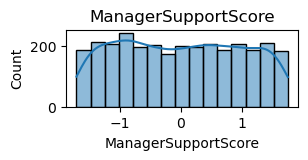

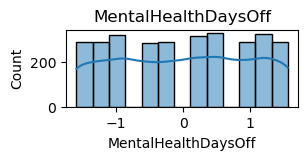

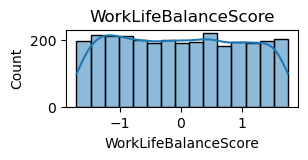

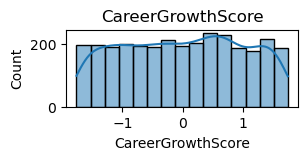

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
def getHist(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(3, 1))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(col)
        plt.show()

getHist(df, numerical_cols)
